In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import cv2
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import cv2
from sklearn.model_selection import train_test_split
import random

def loadImages(directory, test_size=0.2, random_state=42, max_images_per_label=11000):
    data = []
    imageSize = 80
    labels = os.listdir(directory)
    for label in labels:
        folder = os.listdir(os.path.join(directory, label))
        image_count = 0  # Counter for the number of images per label
        for file in folder:
            if image_count >= max_images_per_label:
                break
            img_path = os.path.join(directory, label, file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (imageSize, imageSize))
                data.append([label, img])
                image_count += 1
            else:
                print(f"Failed to read image: {file}")

    # Shuffle the data indices
    indices = list(range(len(data)))
    random.shuffle(indices)

    # Use shuffled indices to access shuffled data
    shuffled_data = [data[i] for i in indices]

    # Splitting the data into training and test sets
    labels, images = zip(*shuffled_data)
    X_train, X_test, y_train, y_test = train_test_split(
        images, labels, test_size=test_size, random_state=random_state
    )

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = loadImages('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages')


Failed to read image: 6059.jpg
Failed to read image: 11849.jpg
Failed to read image: 3288.jpg
Failed to read image: 6238.jpg


Corrupt JPEG data: 226 extraneous bytes before marker 0xd9


Failed to read image: 2688.jpg


Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


Failed to read image: 7112.jpg
Failed to read image: 8730.jpg
Failed to read image: 11702.jpg
Failed to read image: 7133.jpg


Failed to read image: 11853.jpg
Failed to read image: 7969.jpg
Failed to read image: 7459.jpg
Failed to read image: 10747.jpg


Corrupt JPEG data: 254 extraneous bytes before marker 0xd9


Failed to read image: 6718.jpg
Failed to read image: 2877.jpg
Failed to read image: 3136.jpg


Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9


Failed to read image: 11675.jpg
Failed to read image: 4367.jpg
Failed to read image: Thumbs.db
Failed to read image: 5604.jpg
Failed to read image: 9188.jpg
Failed to read image: 3588.jpg
Failed to read image: 11410.jpg
Failed to read image: 1308.jpg
Failed to read image: 10158.jpg
Failed to read image: 2384.jpg


Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


Failed to read image: 4833.jpg
Failed to read image: 850.jpg
Failed to read image: 8470.jpg


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


Failed to read image: 11210.jpg
Failed to read image: 660.jpg
Failed to read image: 140.jpg
Failed to read image: 10820.jpg
Failed to read image: 10501.jpg
Failed to read image: 9171.jpg


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


Failed to read image: 9778.jpg


Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


Failed to read image: 2663.jpg
Failed to read image: 11935.jpg
Failed to read image: 10125.jpg
Failed to read image: 11874.jpg
Failed to read image: 936.jpg
Failed to read image: Thumbs.db
Failed to read image: 5553.jpg
Failed to read image: 7978.jpg
Failed to read image: 3491.jpg
Failed to read image: 3300.jpg


Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


Failed to read image: 666.jpg
Failed to read image: 7968.jpg
Failed to read image: 11565.jpg
Failed to read image: 10404.jpg


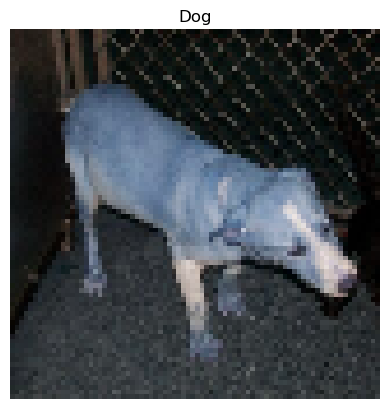

In [3]:
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into X_train, X_test, y_train, y_test

# Print the first image from the training dataset
plt.imshow(X_train[1])
plt.title(y_train[1])
plt.axis('off')
plt.show()

(-0.5, 79.5, 79.5, -0.5)

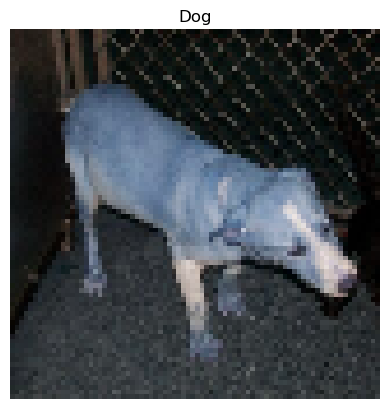

In [4]:
def preprocess_images(images):
    processed_images = []
    for image in images:
        # Convert image to grayscale
        # Normalize pixel values
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        normalized_image = image / 255.0

        processed_images.append(normalized_image)

    return np.array(processed_images)
# Preprocess training images
X_train_processed = preprocess_images(X_train)
del X_train
# Preprocess test images
X_test_processed = preprocess_images(X_test)
del X_test
# Print the first image from the training dataset
plt.imshow(X_train_processed[1])
plt.title(y_train[1])
plt.axis('off')

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.optimizers import SGD

def create_model(input_shape, num_classes):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=(80,80,3), padding='same'))
    # model.add(LeakyReLU(alpha=0.1))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
    # model.add(tf.keras.activations.relu(alpha=0.1))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    # model.add(tf.keras.activations.relu(alpha=0.1))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    # model.add(tf.keras.activations.relu(alpha=0.1))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    # model.add(tf.keras.activations.relu(alpha=0.1))
    model.add(Dropout(0.5))
    model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    return model

input_shape = (80, 80, 3)  # Assuming the preprocessed images are grayscale
num_classes = 2  # Binary classification: cat or dog

model = create_model(input_shape, num_classes)


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [6]:
def replace_labels_with_numbers(labels):
    replaced_labels = []
    for label in labels:
        if label.lower() == 'dog':
            replaced_labels.append(1)
        elif label.lower() == 'cat':
            replaced_labels.append(0)
        else:
            replaced_labels.append(label)
    return replaced_labels
y_train_encoded = replace_labels_with_numbers(y_train)
y_test_encoded = replace_labels_with_numbers(y_test)


In [7]:
X_train_processed = np.array(X_train_processed)
X_test_processed = np.array(X_test_processed)
y_train_encoded = np.array(y_train_encoded)
y_test_encoded = np.array(y_test_encoded)

print(y_test_encoded)

[0 0 1 ... 0 0 1]


In [8]:
# Assuming you have one-hot encoded labels (y_train_encoded, y_test_encoded)
history = model.fit(X_train_processed, y_train_encoded, batch_size=20, epochs=30, validation_data=(X_test_processed, y_test_encoded))

Epoch 1/30
880/880 [==============================] - 16s 7ms/step - loss: 0.6690 - accuracy: 0.5759 - val_loss: 0.6252 - val_accuracy: 0.6577
Epoch 2/30
880/880 [==============================] - 5s 6ms/step - loss: 0.5957 - accuracy: 0.6842 - val_loss: 0.5213 - val_accuracy: 0.7441
Epoch 3/30
880/880 [==============================] - 5s 6ms/step - loss: 0.5158 - accuracy: 0.7479 - val_loss: 0.5053 - val_accuracy: 0.7486
Epoch 4/30
880/880 [==============================] - 5s 6ms/step - loss: 0.4511 - accuracy: 0.7918 - val_loss: 0.4261 - val_accuracy: 0.8111
Epoch 5/30
880/880 [==============================] - 5s 6ms/step - loss: 0.4116 - accuracy: 0.8143 - val_loss: 0.3807 - val_accuracy: 0.8291
Epoch 6/30
880/880 [==============================] - 6s 6ms/step - loss: 0.3695 - accuracy: 0.8338 - val_loss: 0.3734 - val_accuracy: 0.8418
Epoch 7/30
880/880 [==============================] - 6s 6ms/step - loss: 0.3493 - accuracy: 0.8456 - val_loss: 0.3328 - val_accuracy: 0.8570
Epoch

In [9]:
loss, accuracy = model.evaluate(X_test_processed, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

138/138 [==============================] - 1s 4ms/step - loss: 0.3258 - accuracy: 0.8766
Test Loss: 0.3258027136325836
Test Accuracy: 0.8765909075737
